In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
file_path = "Housing.csv"
sample = pd.read_csv(file_path)

In [301]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    sample[col] = sample[col].map({'yes': 1, 'no': 0})

X = sample[inputs].values
Y = sample.values[:, 0]; #Price

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [303]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_lin = SVR(kernel='linear', C=5)
svr_poly = SVR(kernel='poly', C=100, degree=2)

svr_rbf.fit(X_train, y_train)
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

# Predict on test data
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_lin = svr_lin.predict(X_test)
y_pred_poly = svr_poly.predict(X_test)

In [304]:
theta = np.array([
    1900563.24,   # X_0 (intercept)
    2796088.95,   # area
    786167.01,    # bedrooms
    2788723.16,   # bathrooms
    1242479.05,   # stories
    479021.23,    # mainroad
    291412.56,    # guestroom
    413403.10,    # basement
    697124.62,    # hotwaterheating
    843144.28,    # airconditioning
    861042.73,    # parking
    644538.66     # prefarea
])

X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred_hw1 = X_test_with_bias.dot(theta)

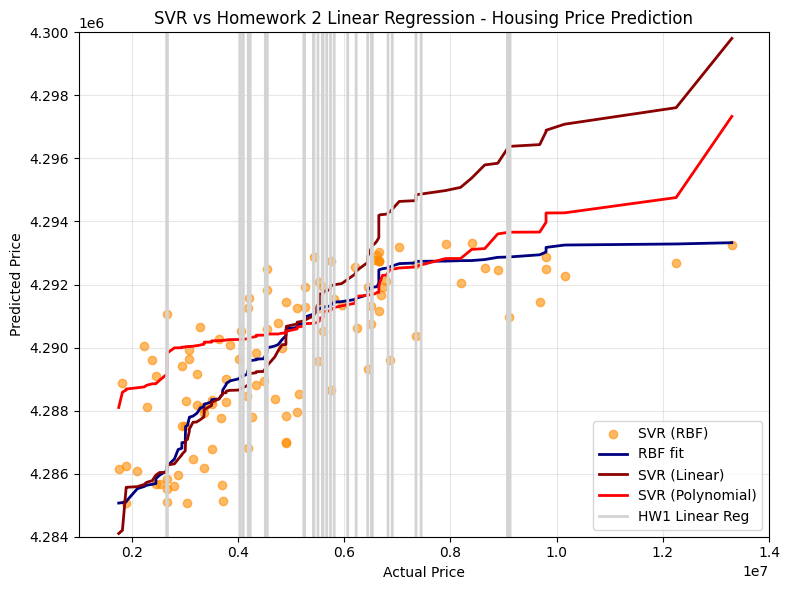

In [305]:
# Plot predictions vs actual prices
lw = 2
plt.figure(figsize=(8, 6))

# Sort by actual price for smooth plotting
sorted_idx = np.argsort(y_test)
y_test_sorted = y_test[sorted_idx]
y_hw1_sorted = y_pred_hw1[sorted_idx]

plt.scatter(y_test, y_pred_rbf, color='darkorange', label='SVR (RBF)', alpha=0.6)
plt.plot(y_test_sorted, np.sort(y_pred_rbf), color='navy', lw=lw, label='RBF fit')
plt.plot(y_test_sorted, np.sort(y_pred_lin), color='darkred', lw=lw, label='SVR (Linear)')
plt.plot(y_test_sorted, np.sort(y_pred_poly), color='red', lw=lw, label='SVR (Polynomial)')

# Homework 1 predictions
plt.plot(y_test_sorted, y_hw1_sorted, color='lightgray', lw=lw, label='HW1 Linear Reg')

# Lock axes to fixed range
plt.xlim(0.1e7, 1.4e7)        # Actual Price range
plt.ylim(4.284e6, 4.3e6)      # Predicted Price range

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('SVR vs Homework 2 Linear Regression - Housing Price Prediction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()